## Imports

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
from osmnx.simplification import simplify_graph
from utils import assign_edge_colors, create_gif
from matplotlib.lines import Line2D

from osmnx.simplification import _is_endpoint
from osmnx.simplification import _get_paths_to_simplify

Location of A Grade-Separated Intersection In Tehran, [here](https://www.google.com/maps/place/35%C2%B042'52.0%22N+51%C2%B021'08.8%22E/@35.7144493,51.34987,17z/data=!3m1!4b1!4m4!3m3!8m2!3d35.714445!4d51.3524449?entry=ttu&g_ep=EgoyMDI1MDMwNC4wIKXMDSoASAFQAw%3D%3D)


In [2]:
lat1, lon1 = 35.71643109802673, 51.34974663404765
lat2, lon2 = 35.712445786680625, 51.35525105737604


## Graph Creation and Simplification

In [3]:
graph = ox.graph_from_bbox((lon1, lat2, lon2, lat1), simplify=False, network_type="drive")
simplified_graph = simplify_graph(graph)

### Settings For Graphs

In [4]:
# Color Settings
BG_COLOR = (0,0,0)
NODE_COLOR = "w"
EDGE_COLORS = ["g", "b", "r","c"]

# Size
NODE_SIZE= 15
EDGE_LW = 3
 


### Visualizaiton of Before And After Simplification 

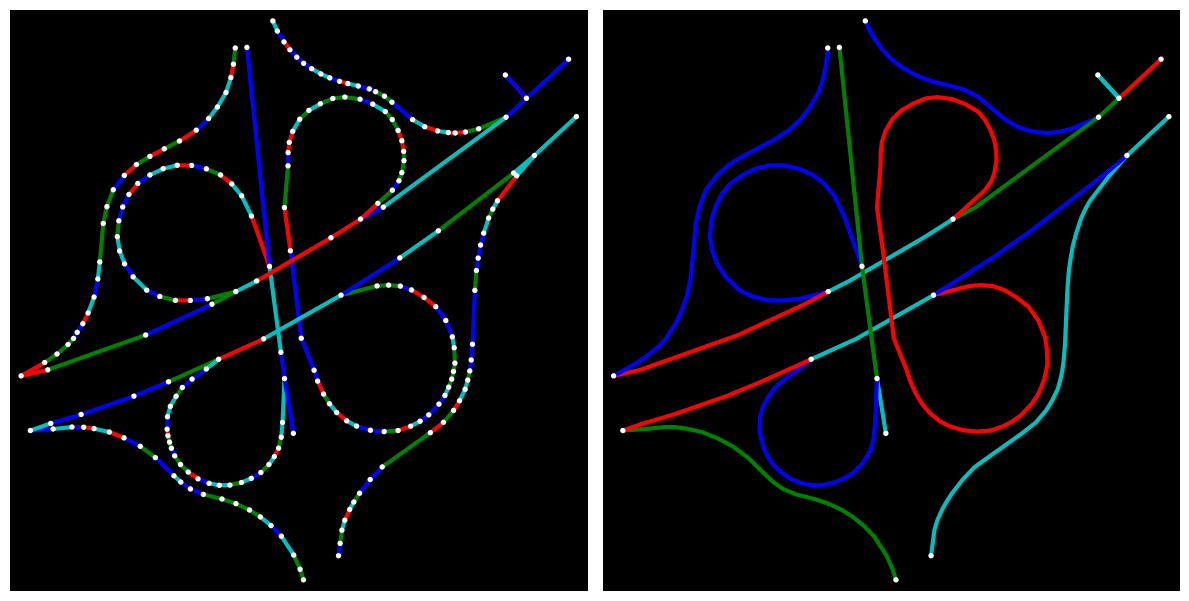

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7), frameon=False)

for ax in axes:
    ax.set_facecolor(BG_COLOR)

graph_edge_colors = assign_edge_colors(graph, EDGE_COLORS)
simplified_graph_edge_colors = assign_edge_colors(simplified_graph, EDGE_COLORS)

fig, axes[0] = ox.plot_graph(graph, ax=axes[0], edge_color=graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
fig, axes[1] = ox.plot_graph(simplified_graph, ax=axes[1], edge_color=simplified_graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False)


plt.tight_layout()
plt.savefig("outputs//before_after.png", dpi=300)
plt.show() 

### Not Simplified Visualzation

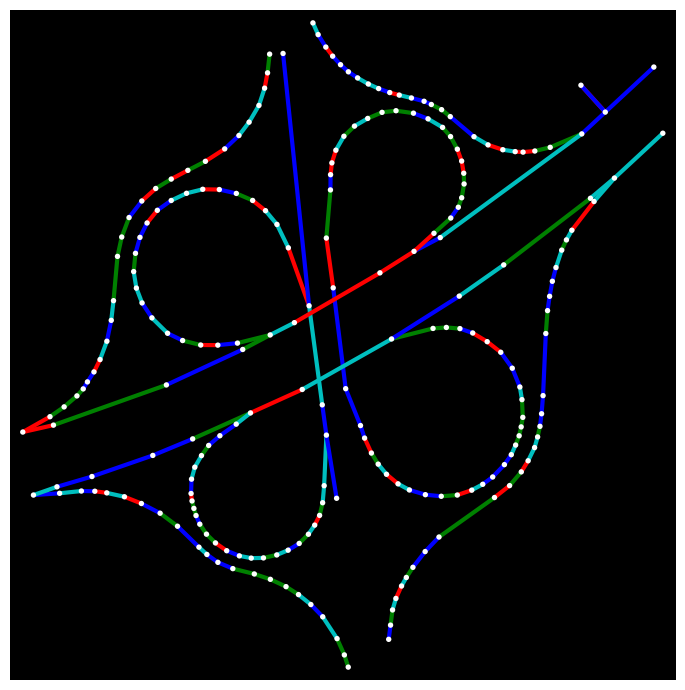

In [6]:
fig, ax = plt.subplots(figsize=(10,7), frameon=False)
ax.set_facecolor(BG_COLOR)
ox.plot_graph(graph, edge_color=graph_edge_colors, ax=ax, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
plt.tight_layout()
plt.savefig("outputs//before.png", dpi=300)

## Endpoints 

In [7]:
endpoints = {n for n in graph.nodes if _is_endpoint(graph, n, None, None)}

### Showing Endpoints

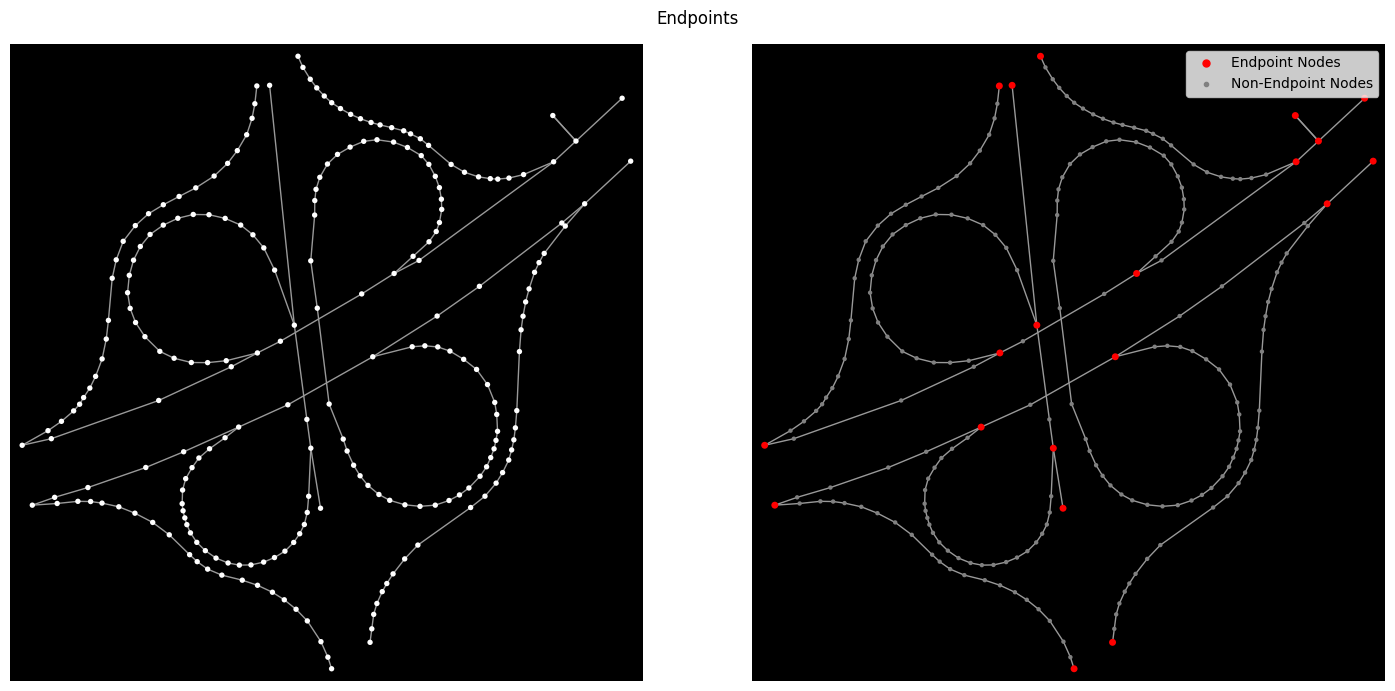

In [8]:
fig, axes = plt.subplots(figsize=(15,7), frameon=False, ncols=2)

for ax in axes:
    ax.set_facecolor(BG_COLOR)

node_size = [25 if node in endpoints  else 10 for node in graph.nodes()]
node_color = ["red" if node in endpoints  else "grey" for node in graph.nodes()]



fig, axes[1] = ox.plot_graph(graph, ax=axes[1], show=False, close=False, node_size=node_size, node_color=node_color)
fig, axes[0] = ox.plot_graph(graph, ax=axes[0], show=False, close=False)

legned_elements = [
    Line2D([0],[0], marker="o", markerfacecolor="red", ls=" ", color="red", label="Endpoint Nodes", markersize=5),
    Line2D([0],[0], marker="o", markerfacecolor="grey", ls=" ", color="grey", label="Non-Endpoint Nodes", markersize=3)
]
axes[1].legend(handles=legned_elements)

fig.suptitle("Endpoints")
fig.tight_layout()
plt.savefig("outputs//endpoints.png", dpi=300)
plt.show()


## Path Creation

In the following cell, the images for creating save will be generated and stored

In [9]:
for index, path in enumerate(_get_paths_to_simplify(graph, None, None)):
    fig, ax = plt.subplots(figsize=(10,7), frameon=False)
    ax.set_facecolor(BG_COLOR)
    fig, ax = ox.plot_graph(graph, show=False, close=False, node_color=node_color, node_size=node_size, ax=ax)
    fig, ax = ox.plot_graph_route(graph, path, route_color="yellow", route_linewidth=5, ax=ax, show=False, close=False)
    fig.tight_layout()    
    fig.savefig(f"outputs//path_gif//{index}.png")
    plt.close(fig)

### Create gif from stored images

In [10]:
path_gif = "outputs/path_gif"
output_filename = "animation.gif"
create_gif(path_gif, output_filename)

### Add Speed and Travel Time to edges for showing effect of simplification

In [11]:
graph = ox.routing.add_edge_speeds(graph)
simplified_graph = ox.routing.add_edge_speeds(simplified_graph)

In [12]:
graph = ox.routing.add_edge_travel_times(graph)
simplified_graph = ox.routing.add_edge_travel_times(simplified_graph)

### Features before and after the simplification

In [13]:
for edge in graph.edges():
    print(edge)
    print(graph.edges[*edge,0])
    break

(26396131, 6467219275)
{'osmid': 4336587, 'highway': 'trunk_link', 'lanes': '1', 'oneway': True, 'reversed': False, 'length': 13.459827835133998, 'speed_kph': 47.1875, 'travel_time': 1.0268689845082362}


In [14]:
for edge in simplified_graph.edges():
    print(edge)
    print(simplified_graph.edges[*edge, 0])
    break

(26605138, 26605142)
{'osmid': 610007271, 'highway': 'trunk_link', 'lanes': '2', 'maxspeed': '80', 'oneway': True, 'reversed': False, 'length': 113.60371489269824, 'geometry': <LINESTRING (51.353 35.715, 51.353 35.715, 51.352 35.715, 51.352 35.714)>, 'speed_kph': 80.0, 'travel_time': 5.11216717017142}


## Path Visualization

In [15]:
edge_index = 7
u, v = list(simplified_graph.edges())[edge_index]

simplified_graph.edges[*list(simplified_graph.edges())[edge_index], 0]

{'osmid': 4623536,
 'highway': 'trunk_link',
 'lanes': '1',
 'maxspeed': '30',
 'oneway': True,
 'reversed': False,
 'length': 262.1963237045064,
 'geometry': <LINESTRING (51.35 35.714, 51.35 35.714, 51.351 35.714, 51.351 35.714, 51.35...>,
 'speed_kph': 30.0,
 'travel_time': 31.46355884454077}

In [16]:
path = nx.shortest_path(graph, u, v, weight='length')
len(path)

22

In [17]:
for first_node, second_node in zip(path[:-1],path[1:]):
    print(graph.edges[(first_node, second_node,0)])

{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 17.890325032885485, 'speed_kph': 30.0, 'travel_time': 2.1468390039462584}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 14.967907031275482, 'speed_kph': 30.0, 'travel_time': 1.7961488437530577}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 9.146947820598164, 'speed_kph': 30.0, 'travel_time': 1.0976337384717798}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 8.247557095451983, 'speed_kph': 30.0, 'travel_time': 0.9897068514542379}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 12.35128865779044, 'speed_kph': 30.0, 'travel_time': 1.4821546389348526}
{'osmid': 4623536, 'highway'

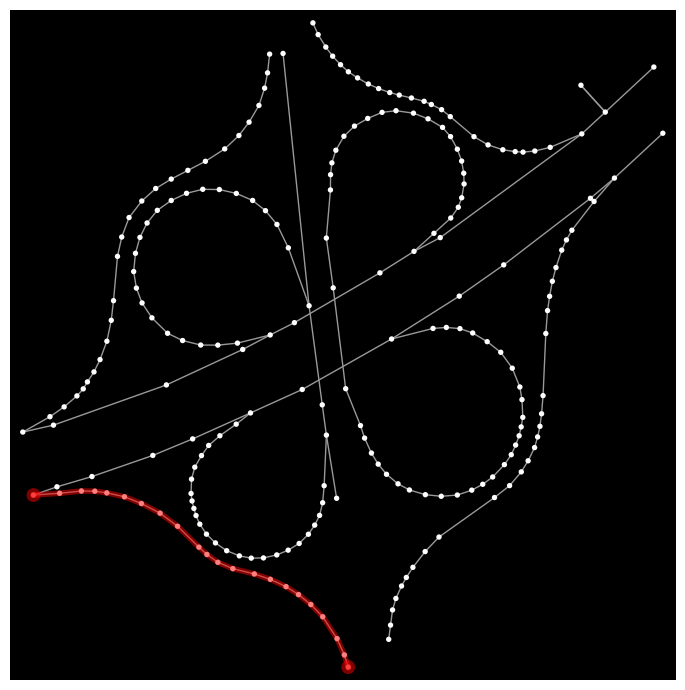

In [18]:
fig, ax = plt.subplots(figsize=(7,7), frameon=False)
ax.set_facecolor(BG_COLOR)
fig, ax = ox.plot_graph(graph, ax=ax, close=False, show=False)
fig, ax = ox.plot_graph_route(graph, route=path, ax=ax, close=False, show=False)
fig.tight_layout()
fig.savefig("outputs//sample_route1.png")
plt.show()